In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
model = Sequential()

# Layer 1
model.add(Conv2D(96, kernel_size=(3,3), strides=(1,1), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 4
model.add(Conv2D(384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Layer 5
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.3413 - loss: 1.8416 - val_accuracy: 0.0980 - val_loss: 9.3870
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5835 - loss: 1.1688 - val_accuracy: 0.5267 - val_loss: 1.2874
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.6762 - loss: 0.9306 - val_accuracy: 0.6225 - val_loss: 1.1022
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7286 - loss: 0.7894 - val_accuracy: 0.6992 - val_loss: 0.8585
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.7696 - loss: 0.6753 - val_accuracy: 0.6861 - val_loss: 0.9578
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8043 - loss: 0.5661 - val_accuracy: 0.6954 - val_loss: 0.9703
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8296 - loss: 0.4911 - val_accuracy: 0.7197 - val_loss: 0.8790
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8561 - loss: 0.4205 - 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

model.save('/content/drive/MyDrive/Colab Notebooks/models/alexnet.keras')

Test Accuracy: 0.7613


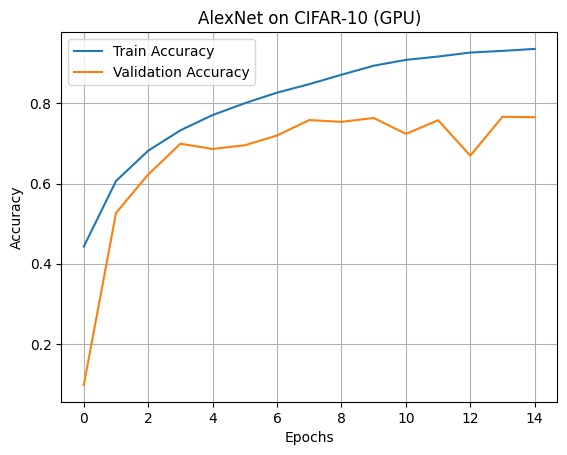

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet on CIFAR-10 (GPU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()